# MMA 831 EMC (Final Project)

Dataset from: https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

Context - A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only \\$499 which is \\$999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

Objective - The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

Data description is as follows:
- **Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise**
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase


**Additional Objective**: Choose AUC score as the target metric, but account for precision and recall as secondary metrics.

## Exploratory Data Analysis 

### Importing libraries and loading the dataset

In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import curdir

In [2]:
# Assign data path
superstore_df_path = os.path.join(curdir, 'superstore.csv')

# Load dataset
superstore_df = pd.read_csv('superstore.csv')

### Data Preview

In [3]:
# Check the number of data
print("Number of data in superstore is: ", superstore_df.shape)

Number of data in superstore is:  (2240, 22)


In [4]:
# Check dataframe
# Check first 10 dataframes
superstore_df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


In [5]:
# Check data type
superstore_df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [6]:
# Check missing values
superstore_df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [7]:
# Check column names
superstore_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

Categorical Variables

- Education
- Martial_Status

In [8]:
# Check datapoints in categorical variables (Education)
superstore_df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [9]:
# Check datapoints in categorical variables (Martial Status)
superstore_df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [10]:
# Grouping and renaming categories for 'Education'
superstore_df['Education'] = superstore_df['Education'].replace({
    '2n Cycle': 'Master',
    'Graduation': 'Bachelor',
    'Basic': 'High School'
})

# Grouping categories for 'Marital_Status'
superstore_df['Marital_Status'] = superstore_df['Marital_Status'].replace({
    'Widow': 'Single',
    'YOLO': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'Divorced': 'Single',
    'Together': 'Married'
})

In [11]:
# Check updated data points from each variable
print(superstore_df['Education'].unique())
print(superstore_df['Marital_Status'].unique())

['Bachelor' 'PhD' 'Master' 'High School']
['Single' 'Married']


In [12]:
#Check updated version of superstore dataset
superstore_df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Bachelor,Single,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Bachelor,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Bachelor,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Bachelor,Married,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Bachelor,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


### Check correlation

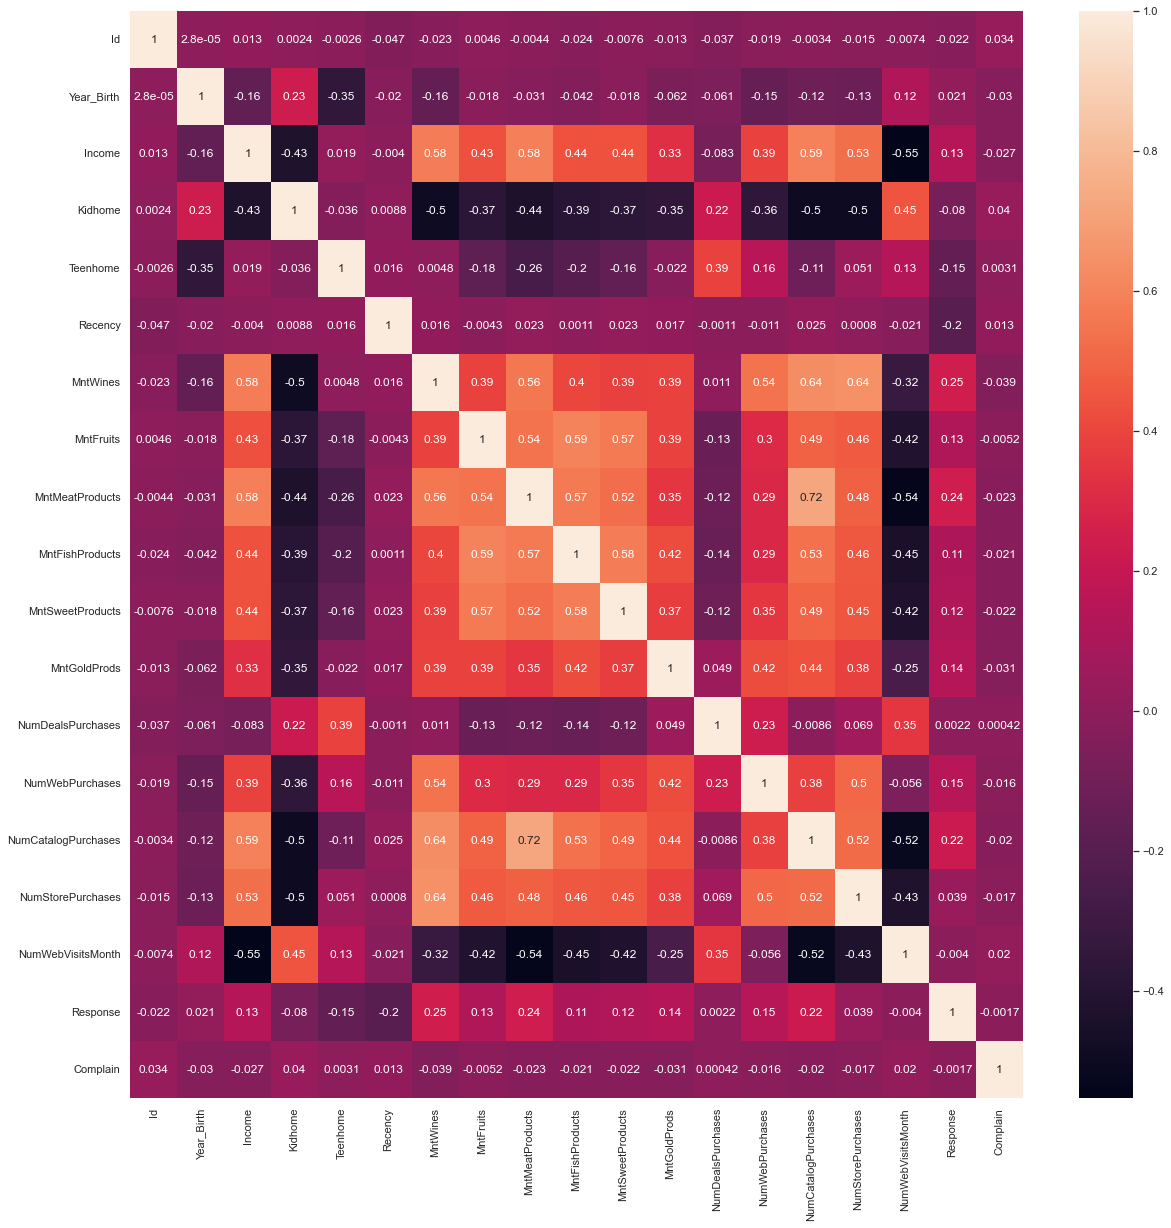

In [13]:
# Create correlation heatmap
corr_matrix = superstore_df.corr()
sns.set (rc = {'figure.figsize':(20, 20)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Positive Correlations

- Year_Birth 
- Income
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MnTGoldProducts
- NumDealsPurchased
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases

These are the varaibels that has positive correlations with the target variable "Response". It means as these variables increase, the possibility of a customer accepting a promotional offer tends to increase.

#### Convert Dt_Customer data

The Dt_customer column should be divieded as Year, Month, and Day as it could negatively impact the prerformance of machine learning model when OneHotEncoder applies to the dataset.

In [14]:
# Convert 'Dt_Customer' to datetime format
superstore_df['Dt_Customer'] = pd.to_datetime(superstore_df['Dt_Customer'], format='%m/%d/%Y')

# Create new columns for year, month, and day
superstore_df['Year'] = superstore_df['Dt_Customer'].dt.year
superstore_df['Month'] = superstore_df['Dt_Customer'].dt.month
superstore_df['Day'] = superstore_df['Dt_Customer'].dt.day

# Drop 'Dt_Customer' from superstore_df
superstore_df = superstore_df.drop(columns=['Dt_Customer'])

# Check columns
superstore_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Year', 'Month', 'Day'],
      dtype='object')

## Feature Engineering 

In [15]:
# Separate features and labels
features = superstore_df.drop(['Response'], axis=1)
labels = superstore_df[['Response']]

# Define the column transformer for preprocessing
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, stratify=labels)

In [17]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, StandardScaler

# Create simple imputer
simple_imputer = SimpleImputer(strategy='median')

# Impute missing values using SimpleImputer on "Income"
X_train['Income'] = simple_imputer.fit_transform(X_train[['Income']])
X_test['Income'] = simple_imputer.transform(X_test[['Income']])

In [18]:
# Use OneHotEncoder on Categorical Variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensuring the number of datasets are the same between train and test dataset after the encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, axis=1, fill_value=0)

In [19]:
X_train_encoded['Education_Bachelor']

2078    1
482     0
201     1
1514    0
943     0
       ..
242     0
1586    0
1698    1
2077    1
1672    0
Name: Education_Bachelor, Length: 1568, dtype: uint8

In [20]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

## Machine Learning Model

### Logistic Regression

In [21]:
# Import libraries for Logistic Regression and Evaluation Matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# Ensure y_train & y_test is a 1-dimensional array
y_train_array = y_train.values.squeeze()
y_test_array = y_test.values.squeeze()

# Build a Logistic Regression Model
lr_model = LogisticRegressionCV(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_scaled, y_train_array)

LogisticRegressionCV(max_iter=1000)

In [22]:
# Predict the labels for the test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_probas_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate and print the accuracy
accuracy_lr = accuracy_score(y_test_array, y_pred_lr)
print("Accuracy: ", accuracy_lr)

# Calculate and print the ROC score
y_auc_lr = roc_auc_score(y_test_array, y_probas_lr)
print("AUC ", y_auc_lr)

Accuracy:  0.8779761904761905
AUC  0.8529895104895105


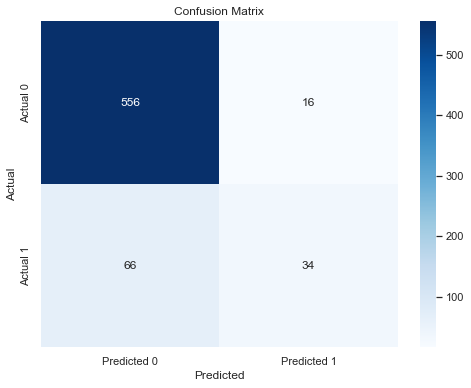

In [23]:
# Print the confusion matrix
confusion_mat_lr = confusion_matrix(y_test_array, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Print the classification report
class_report_lr = classification_report(y_test_array, y_pred_lr)
print("Classification Report: \n", class_report_lr)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       572
           1       0.68      0.34      0.45       100

    accuracy                           0.88       672
   macro avg       0.79      0.66      0.69       672
weighted avg       0.86      0.88      0.86       672



The model’s accuracy is approximately 88%, indicating a decent performance. The confusion matrix reveals that the model correctly predicted a significant number of positive instances, while it also accurately identified a smaller number of negative instances. Furthermore, the classification report highlights that the metrics for class 0 are quite high, whereas the performance for class 1 is lacking. Overall, the model performs reasonably well, but exploring more advanced models could potentially improve its performance.

### XGBoost Model

In [25]:
# Import xgboost library
from xgboost import XGBClassifier

# Define the XGBoost classifier
xgb_model = XGBClassifier()

# Fit and transform XGBosst model
xgb_model.fit(X_train_scaled, y_train_array)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Hyperparameter Tuning 

In [26]:
from sklearn.model_selection import GridSearchCV

# Create parameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 5],
    'learning_rate': [0.02, 0.1, 0.3]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv = 5, scoring = 'roc_auc')

# Fit the Grid Search object to the data
grid_search.fit(X_train_scaled, y_train_array)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}


In [27]:
# Best parameters
param_grid_best = {
    'n_estimators': [150],
    'max_depth': [2],
    'learning_rate': [0.3]
}

grid_search_best = GridSearchCV(estimator = xgb_model, param_grid = param_grid_best, cv = 5, scoring = 'roc_auc')

grid_search_best.fit(X_train_scaled, y_train_array)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [28]:
# Predict the labels for the test set
y_pred_xgb = grid_search_best.predict(X_test_scaled)
y_probas_xgb = grid_search_best.predict_proba(X_test_scaled)[:, 1]

# Calculate and print the accuracy
accuracy_xgb = accuracy_score(y_test_array, y_pred_xgb)
print("Accuracy: ", accuracy_xgb)

# Calculate and print the ROC score
auc_xgb = roc_auc_score(y_test_array, y_probas_xgb)
print("AUC ", auc_xgb)

Accuracy:  0.875
AUC  0.8667482517482519


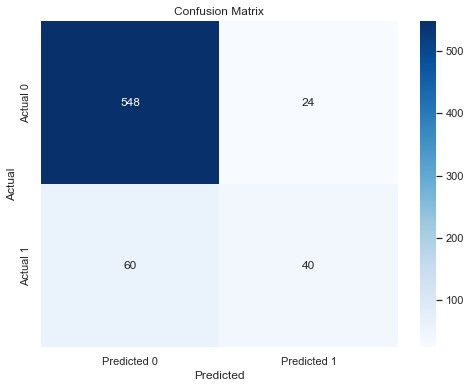

In [29]:
# Print the confusion matrix
confusion_mat_xgb = confusion_matrix(y_test_array, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Print the classification report
class_report = classification_report(y_test_array, y_pred_xgb)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       572
           1       0.62      0.40      0.49       100

    accuracy                           0.88       672
   macro avg       0.76      0.68      0.71       672
weighted avg       0.86      0.88      0.86       672



### Random Forest Model

In [31]:
# import random forest library
from sklearn.ensemble import RandomForestClassifier

# Build random forest model
rf_model = RandomForestClassifier(class_weight='balanced')

# Fit and transform X_train_encoded & y_train
rf_model.fit(X_train_scaled, y_train_array)

RandomForestClassifier(class_weight='balanced')

In [32]:
# Create parameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [5, 6, 7]
}

# Create GridSearchCV
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, cv = 7, scoring = 'roc_auc')

# Fit the Grid Search object to the data
grid_search_rf.fit(X_train_scaled, y_train_array)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search_rf.best_params_)

Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 6, 'n_estimators': 300}


In [33]:
# Best parameters
param_grid_best_rf = {
    'n_estimators': [200],
    'max_depth': [4],
    'min_samples_leaf': [5]
}

grid_search_best_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid_best_rf, cv = 5, scoring = 'roc_auc')

grid_search_best_rf.fit(X_train_scaled, y_train_array)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4], 'min_samples_leaf': [5],
                         'n_estimators': [200]},
             scoring='roc_auc')

In [34]:
# Predict the labels for the test set
y_pred_rf = grid_search_best_rf.predict(X_test_scaled)
y_probas_rf = grid_search_best_rf.predict_proba(X_test_scaled)[:, 1]

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test_array, y_pred_rf)
print("Accuracy: ", accuracy_rf)

# Calculate and print the ROC score
auc_rf = roc_auc_score(y_test_array, y_probas_rf)
print("AUC: ", auc_rf)

Accuracy:  0.8020833333333334
AUC:  0.8584353146853146


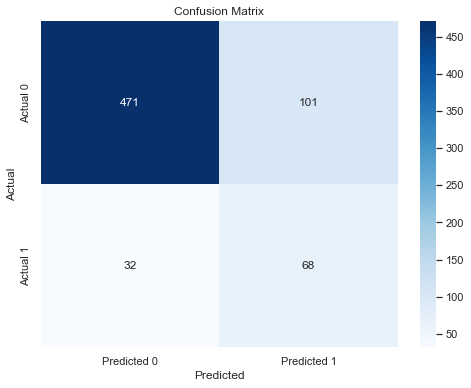

In [35]:
# Print the confusion matrix
confusion_mat_rf = confusion_matrix(y_test_array, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Print the classification report
class_report_rf = classification_report(y_test_array, y_pred_rf)
print("Classification Report: \n", class_report_rf)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       572
           1       0.40      0.68      0.51       100

    accuracy                           0.80       672
   macro avg       0.67      0.75      0.69       672
weighted avg       0.86      0.80      0.82       672



XGBoost model is the best so far, but recall and f-1 score for Class 1 is still low.

In [37]:
# Import libraries for Stacking Model
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [38]:
# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model)
], final_estimator=LogisticRegression())

# Fit the Stacking Classifier to the training data
stacking_model.fit(X_train_scaled, y_train_array)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...bin=None,
                                     

In [39]:
# Predict the labels for the test set
y_pred_stacking = stacking_model.predict(X_test_scaled)
y_probas_stacking = stacking_model.predict_proba(X_test_scaled)[:, 1]

# Calculate and print the accuracy
accuracy_stacking = accuracy_score(y_test_array, y_pred_stacking)
print("Accuracy: ", accuracy_stacking)

# Calculate and print the ROC score
auc_stacking = roc_auc_score(y_test_array, y_probas_stacking)
print("AUC: ", auc_stacking)

Accuracy:  0.8764880952380952
AUC:  0.8718356643356644


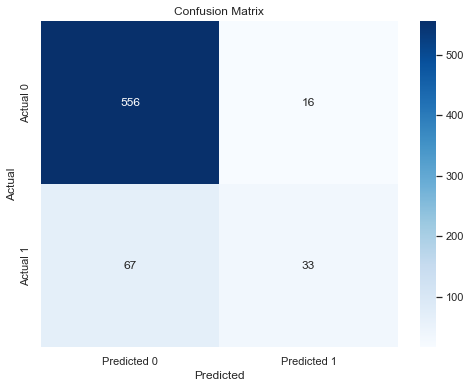

In [40]:
# Print the confusion matrix
confusion_mat_stacking = confusion_matrix(y_test_array, y_pred_stacking)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Print the classification report
class_report_stacking = classification_report(y_test_array, y_pred_stacking)
print("Classification Report: \n", class_report_stacking)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       572
           1       0.67      0.33      0.44       100

    accuracy                           0.88       672
   macro avg       0.78      0.65      0.69       672
weighted avg       0.86      0.88      0.86       672



The Stacking Model has shown the best results so far. However, it still has low recall and F1-score for predicting target variable 1. Consequently, predicting the customers’ acceptance rate is not as accurate as predicting the rejection rate.

Based on the correlation we identified earlier, the price of products and the number of purchases significantly influence customers’ behavior towards accepting gold membership. We recommend including promotions on various products and offering discounts on popular items when customers purchase the gold membership. This strategy can help the superstore increase the number of customers who opt for the gold membership.